# S-Weak order and s-Tamari lattice

Sage demo worksheet

In [1]:
from viewLatex import viewLatex
from spermutahedron import *

## The $s$-weak order

### $s$-decreasing trees

You can create the set of all $s$-decreasing trees for a given $s$

In [2]:
SD = SDecreasingTrees((1,2,2)); SD

S-decreasing trees of (1, 2, 2)

In [3]:
SD.cardinality()

15

In [4]:
L = list(SD)
L

[3[2[[], [], []], 1[[], []], []],
 3[2[[], [], []], [], 1[[], []]],
 3[2[1[[], []], [], []], [], []],
 3[2[[], 1[[], []], []], [], []],
 3[2[[], [], 1[[], []]], [], []],
 3[1[[], []], 2[[], [], []], []],
 3[[], 2[[], [], []], 1[[], []]],
 3[[], 2[1[[], []], [], []], []],
 3[[], 2[[], 1[[], []], []], []],
 3[[], 2[[], [], 1[[], []]], []],
 3[1[[], []], [], 2[[], [], []]],
 3[[], 1[[], []], 2[[], [], []]],
 3[[], [], 2[1[[], []], [], []]],
 3[[], [], 2[[], 1[[], []], []]],
 3[[], [], 2[[], [], 1[[], []]]]]

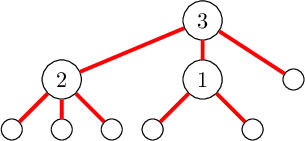

In [5]:
tree = L[0]
viewLatex(tree)

When $s$ does not contain any 0, you can see the associated multi permutation

In [7]:
tree.to_s_permutation()

[2, 2, 3, 1, 3]

Or construct the tree directly from the $s$-permutation

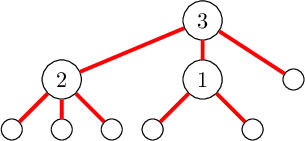

In [8]:
viewLatex(SDecreasingTrees.from_s_permutation([2,2,3,1,3]))

Here is the example of Fig. 1.

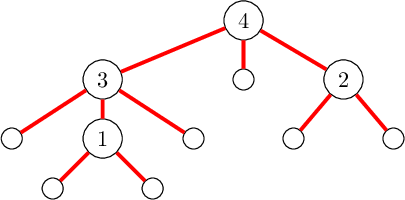

In [9]:
viewLatex(SDecreasingTrees.from_s_permutation([3,1,3,4,4,2]))

Otherwise, you can construct the tree using the tree inversion.

Here is the tree of Fig. 2. The constructor takes a tuple `(s,d)` where `s` is the sequence and `d` a python dictionnary of the tree-inversions.

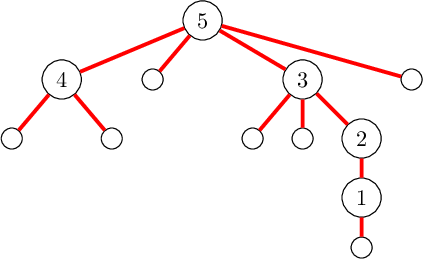

In [10]:
fig2 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (4,3):1, (4,2):1,(4,1):1, (3,2):2, (3,1):2}))
viewLatex(fig2)

Once the tree is constructed, you can access its tree-inversions this way

In [11]:
fig2.inversion(5,3)

2

In [12]:
fig2.inversion(5,4)

0

The inversions generator gives a list of all $(c,a)$ such that the cardinality of $(c,a)$ is greater than 0.

In [14]:
list(fig2.inversions())

[(4, 3), (5, 3), (4, 2), (5, 2), (3, 2), (4, 1), (5, 1), (3, 1)]

The tree is constructed using Algorithm 1.8 (ConstructTree). In particular, it is enough to provide the inversions $(c,a)$ between where $a$ is a descendant of $c$. For example, for Fig. 2.

In [15]:
fig2 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (3,2):2, (3,1):2}))

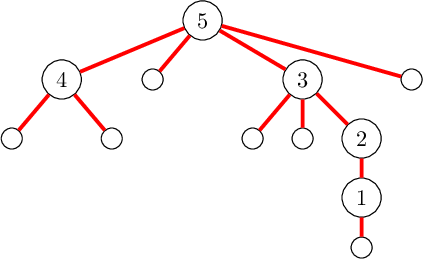

In [16]:
viewLatex(fig2)

The other inversions are updated after the construction.

In [17]:
fig2.inversion(4,3)

1

### The $s$-weak lattice

You can construct the $s$-weak lattice from the set of $s$-decreasing trees.

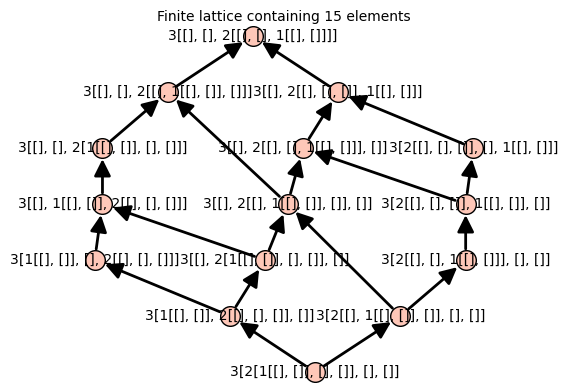

In [18]:
SD = SDecreasingTrees((1,2,2))
SD.lattice()

We have created a nice LaTeX layout for $2$-dimensional case $n \leq 3$

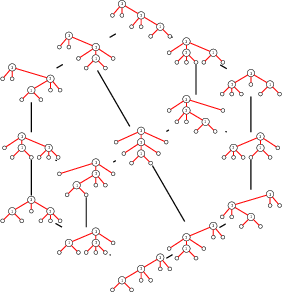

In [19]:
viewLatex(SD.lattice_printer())

Here are the examples of Fig.4.

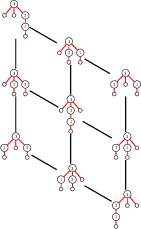

In [22]:
viewLatex(SDecreasingTrees((0,0,2)).lattice_printer())

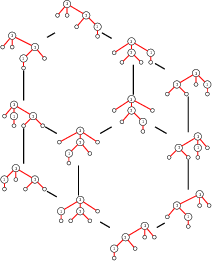

In [23]:
viewLatex(SDecreasingTrees((0,1,2)).lattice_printer())

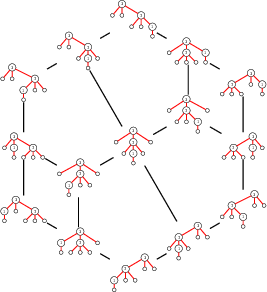

In [24]:
viewLatex(SDecreasingTrees((0,2,2)).lattice_printer())

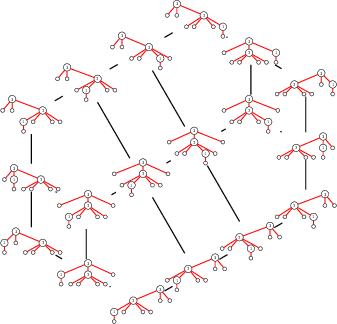

In [25]:
viewLatex(SDecreasingTrees((0,3,2)).lattice_printer())

The code also contains all the needed poset / lattice computations. Here is the compuation of the join given on Fig. 5.

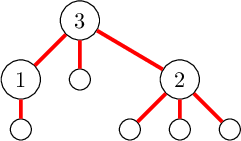

In [26]:
tree1 = SDecreasingTree(((0,2,2),{(3,2):2}))
viewLatex(tree1)

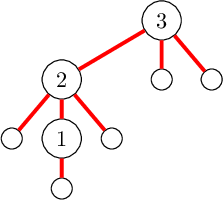

In [29]:
tree2 = SDecreasingTree(((0,2,2),{(2,1):1}))
viewLatex(tree2)

In [30]:
tree1.sweak_lequal(tree2)

False

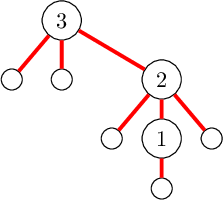

In [31]:
join = tree1.sweak_join(tree2)
viewLatex(join)

In [32]:
tree1.sweak_lequal(join)

True

In [33]:
tree2.sweak_lequal(join)

True

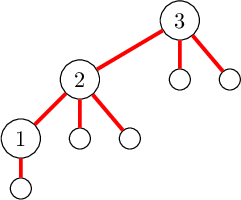

In [34]:
meet = tree1.sweak_meet(tree2)
viewLatex(meet)

In [35]:
meet.sweak_lequal(tree1)

True

In [36]:
meet.sweak_lequal(tree2)

True

### Cover relations

You have also access to tree-ascents and successors / predecessors in the lattice. See here Example 1.26.

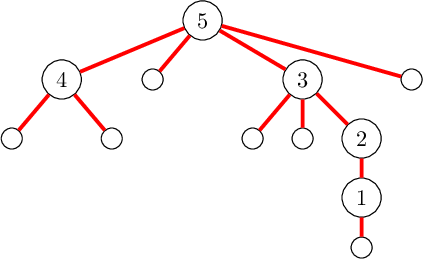

In [37]:
fig2 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (4,3):1, (4,2):1,(4,1):1, (3,2):2, (3,1):2}))
viewLatex(fig2)

In [38]:
list(fig2.tree_ascents())

[(1, 5), (2, 5), (4, 5)]

In [39]:
list(fig2.sweak_succ())

[5[4[[], []], [], 3[[], [], 2[[]]], 1[[]]],
 5[4[[], []], [], 3[[], [], 1[[]]], 2[[]]],
 5[[], 4[[], []], 3[[], [], 2[1[[]]]], []]]

In [40]:
list(fig2.tree_descents())

[(3, 1), (3, 2), (5, 3)]

In [41]:
list(fig2.sweak_prec())

[5[4[[], []], [], 3[[], 1[[]], 2[[]]], []],
 5[4[[], []], [], 3[[], 2[[]], 1[[]]], []],
 5[4[[], []], 3[[], [], []], 2[1[[]]], []]]

Here, the example of Fig. 7.

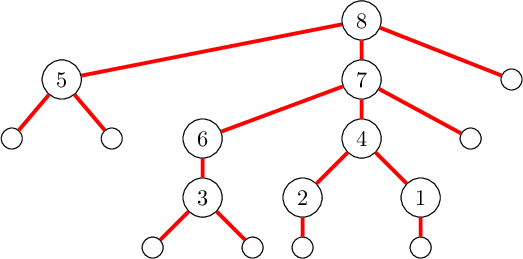

In [42]:
fig7 = SDecreasingTree(((0,0,1,1,1,0,2,2), {(8,7):1, (8,6):1, (8,4):1, (8,3):1, (8,2):1, (8,1):1, (7,4):1, (7,2):1, (7,1):1, (4,1):1}))
viewLatex(fig7)

In [43]:
list(fig7.tree_ascents())

[(1, 7), (2, 4), (3, 7), (5, 8), (6, 7), (7, 8)]

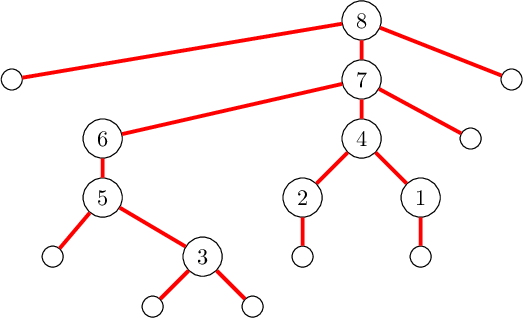

In [44]:
viewLatex(fig7.rotate_ascent((5,8)))

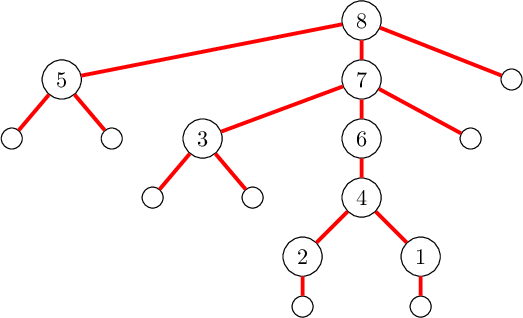

In [45]:
viewLatex(fig7.rotate_ascent((6,7)))

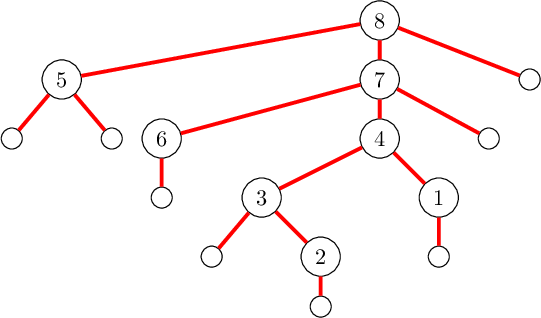

In [46]:
viewLatex(fig7.rotate_ascent((3,7)))

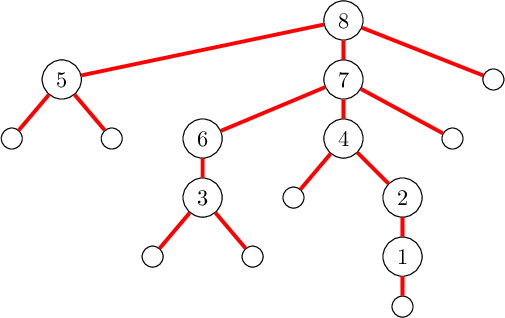

In [47]:
viewLatex(fig7.rotate_ascent((2,4)))

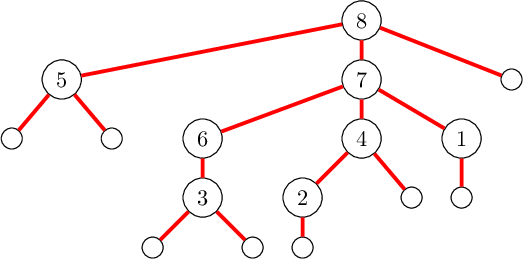

In [48]:
viewLatex(fig7.rotate_ascent((1,7)))

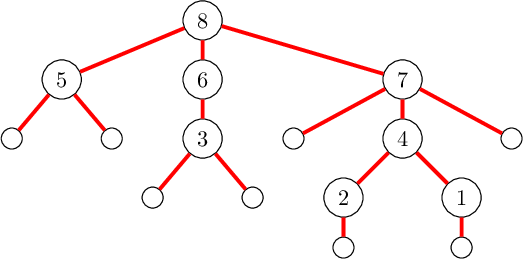

In [49]:
viewLatex(fig7.rotate_ascent((7,8)))

### A Semidistributive, congruence uniform, polygonal lattice.

Some of the properties of Section 1.5 can be checked directly with Sage on examples.

Semi-distributivity:

In [57]:
SDecreasingTrees.some_s()

[(),
 (0,),
 (1,),
 (0, 1),
 (0, 2),
 (0, 1, 1),
 (0, 2, 2),
 (0, 0, 2),
 (0, 1, 1, 1),
 (0, 2, 2, 2),
 (0, 3, 3, 3),
 (0, 1, 0, 2),
 (0, 1, 1, 2, 2),
 (0, 0, 1, 0, 0, 2)]

In [56]:
all(SDecreasingTrees(s).lattice().is_semidistributive() for s in SDecreasingTrees.some_s())

True

Doubling construction (i.e. congruence uniform)

In [58]:
all(SDecreasingTrees(s).lattice().is_constructible_by_doublings("interval") for s in SDecreasingTrees.some_s())

True

The explicit lattice doubling to obtain a given $s$-weak lattice is also implemented

In [59]:
SD = SDecreasingTrees((0,2,2))

In [61]:
list(SD.lattice_doublings())

[Finite poset containing 1 elements,
 Finite poset containing 2 elements,
 Finite poset containing 3 elements,
 Finite poset containing 6 elements,
 Finite poset containing 8 elements,
 Finite poset containing 12 elements,
 Finite poset containing 15 elements]

## Pure intervals of the $s$-weak order

We define a special class for pure intervals where each element is constructed from an $s$-decreasing tree and a liste of tree-ascents.

Here is the example of Fig. 11.

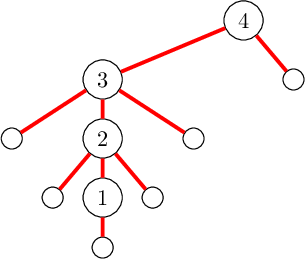

In [2]:
fig11_tree = SDecreasingTree(((0,2,2,1),{(3,2):1, (3,1):1, (2,1): 1}))
viewLatex(fig11_tree)

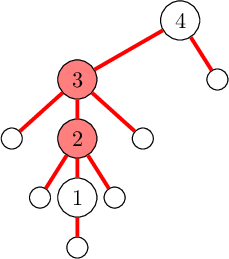

In [3]:
fig11 = SPureIntervalFace(fig11_tree, [(2,3),(3,4)])
viewLatex(fig11)

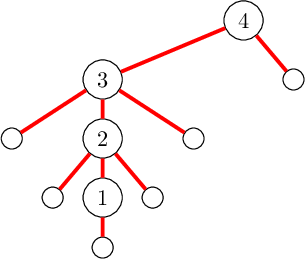

In [4]:
viewLatex(fig11.tree_min())

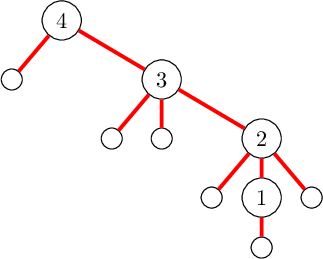

In [5]:
viewLatex(fig11.tree_max())

In [6]:
list(fig11.interval_trees())

[4[3[[], 2[[], 1[[]], []], []], []],
 4[[], 3[[], 2[[], 1[[]], []], []]],
 4[[], 3[[], [], 2[[], 1[[]], []]]],
 4[3[[], [], 2[[], 1[[]], []]], []],
 4[3[[], [], []], 2[[], 1[[]], []]]]

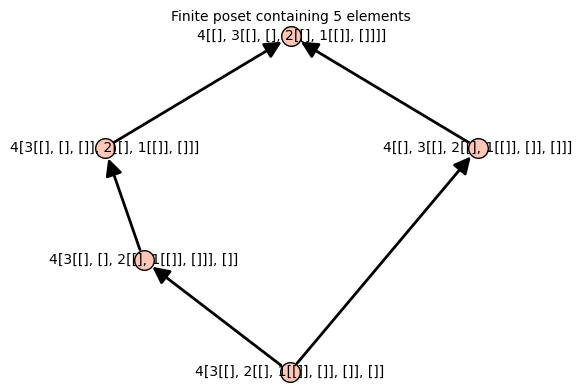

In [7]:
fig11.interval_as_poset()

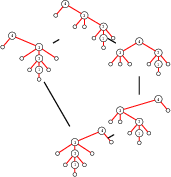

In [8]:
viewLatex(fig11.lattice_printer())

In [9]:
fig11.variations()

{(4, 3): 0, (4, 2): 0, (3, 2): 1, (4, 1): 0, (3, 1): 1}

In [10]:
fig11.essential_variations()

{(4, 3): 0, (3, 2): 1}

As proved in the paper, the minimal essential variations are the selected tree-ascents.

In [11]:
fig11.ascents()

((2, 3), (3, 4))

Here is the example of Fig. 12.

In [4]:
fig12_tree = SDecreasingTree(((0,0,2,2,1,2,1,0,2,3),{(10,9):2,(10,7):2,(10,6):2,(10,4):2,(10,2):2,(10,1):2,(10,3):2,(9,6):1,(9,2):1,(7,4):1,(7,1):1,(7,3):1,(6,2):1,(4,3):1}))

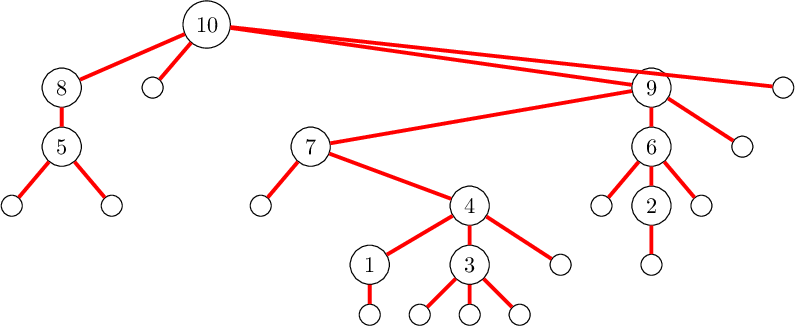

In [5]:
viewLatex(fig12_tree)

In [6]:
fig12 = SPureIntervalFace(fig12_tree, [(1, 4), (2, 6), (4, 9), (5, 10), (6, 9), (8, 10), (9, 10)])

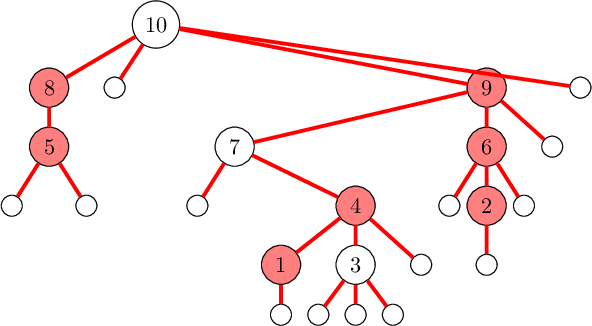

In [7]:
viewLatex(fig12)

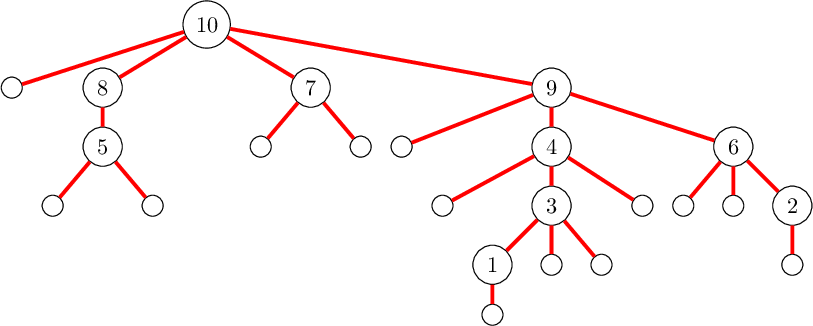

In [13]:
viewLatex(fig12.tree_max())

In [14]:
fig12.interval_as_poset()

Finite poset containing 360 elements (use the .plot() method to plot)

In [15]:
fig12.variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 3): 2,
 (9, 3): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (10, 6): 2,
 (9, 6): 1,
 (10, 2): 2,
 (9, 2): 1,
 (6, 2): 1}

In [16]:
fig12.essential_variations()

{(10, 8): 0,
 (10, 5): 0,
 (10, 9): 2,
 (10, 4): 2,
 (9, 4): 0,
 (10, 1): 2,
 (9, 1): 0,
 (4, 1): 0,
 (9, 6): 1,
 (6, 2): 1}

The conditions of Proposition 2.9 are implemented at the $s$-decreasing tree level. You can check that both previous examples satisfy the pure-interval conditions.

In [6]:
fig11_tree.is_pure(fig11.tree_max())

True

In [7]:
fig12_tree.is_pure(fig12.tree_max())

True

We can generate all $s$-pure intervals (through $s$-decreasing trees and subsets of tree-ascents) and check that they are the ones satisfying the conditions. 

In [6]:
s = (0,2,2,2)

In [7]:
F = list(SPureIntervalFaces(s))

In [11]:
P = set((t1,t2) for t1,t2 in SDecreasingTrees(s).lattice().relations() if t1.is_pure(t2))

In [12]:
len(F)

469

In [13]:
len(P)

469

In [14]:
set((f.tree_min(),f.tree_max()) for f in F) == P

True

Now we show the example of Fig. 13: an interval that is not a pure interval.

In [14]:
s = (0,0,2,2,2)
t1 = SDecreasingTree((s,{(3,1):1}))
t2 = SDecreasingTree((s,{(5, 4): 1, (5, 3): 1, (5, 1): 1, (3, 1): 2, (4, 1): 1}))

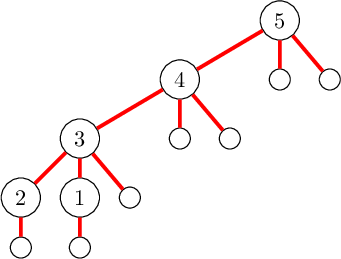

In [15]:
viewLatex(t1)

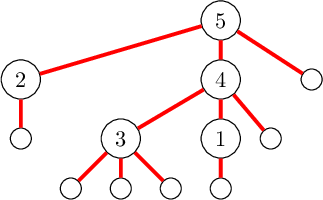

In [16]:
viewLatex(t2)

In [17]:
t1.sweak_lequal(t2)

True

In [18]:
t1.variations(t2)

{(5, 4): 0, (5, 3): 0, (5, 1): 0, (3, 1): 1, (4, 1): 0}

In [19]:
t1.essential_variations(t2)

{(5, 4): 0, (5, 3): 0, (3, 1): 1, (4, 1): 0}

In [20]:
t1.is_plusone(t2)

True

In [21]:
t1.is_pure(t2)

False

You can compute the variation path of pure intervals variations. Here are the examples of Fig. 11 and 12.

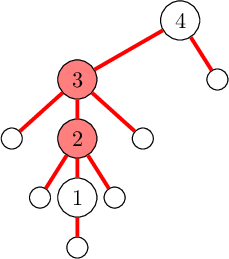

In [9]:
viewLatex(fig11)

In [10]:
for c,a in fig11.variations():
    print("Variation path of ",c,a," : ", fig11.variation_path(c,a))

Variation path of  4 3  :  [4, 3]
Variation path of  4 2  :  [4, 3]
Variation path of  3 2  :  [3, 2]
Variation path of  4 1  :  [4, 3]
Variation path of  3 1  :  [3, 2]


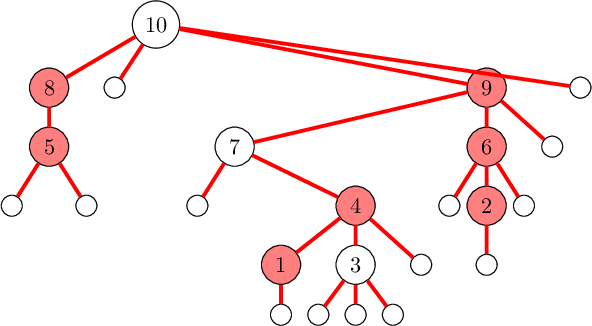

In [11]:
viewLatex(fig12)

In [13]:
for c,a in fig12.variations():
    print("Variation path of ",c,a," : ", fig12.variation_path(c,a))

Variation path of  10 8  :  [10, 8]
Variation path of  10 5  :  [10, 5]
Variation path of  10 9  :  [10, 9]
Variation path of  10 4  :  [10, 9, 4]
Variation path of  9 4  :  [9, 4]
Variation path of  10 3  :  [10, 9, 4]
Variation path of  9 3  :  [9, 4]
Variation path of  10 1  :  [10, 9, 4, 1]
Variation path of  9 1  :  [9, 4, 1]
Variation path of  4 1  :  [4, 1]
Variation path of  10 6  :  [10, 9]
Variation path of  9 6  :  [9, 6]
Variation path of  10 2  :  [10, 9]
Variation path of  9 2  :  [9, 6]
Variation path of  6 2  :  [6, 2]


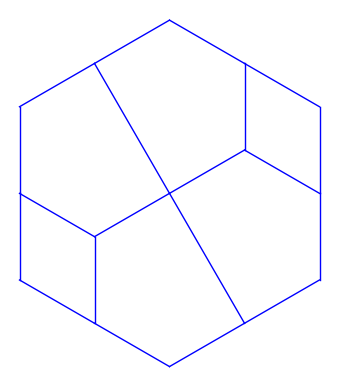

In [6]:
SD.projected_sweak_plot()

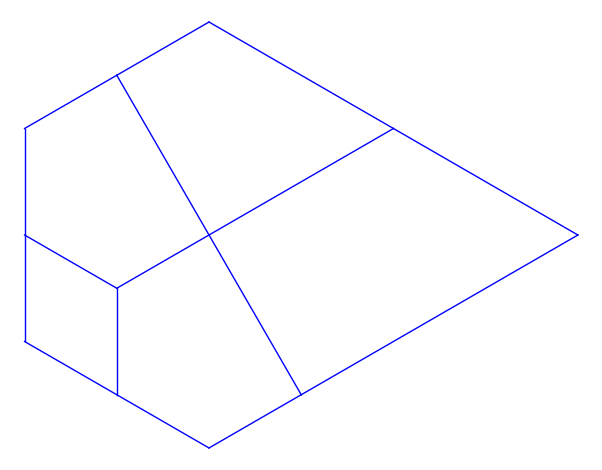

In [3]:
SD.projected_s_tamari_plot()

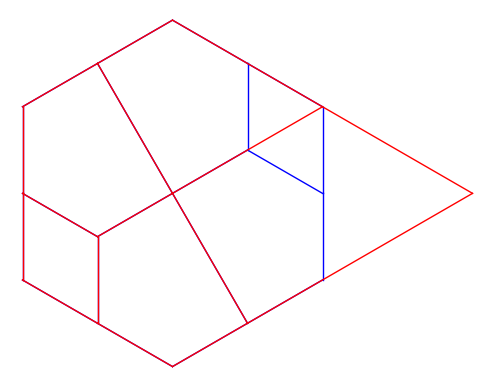

In [4]:
SD.projected_both_plot()

In [6]:
SD = SDecreasingTrees((0,2,2,2))
SD.projected_sweak_plot()

Graphics3d Object

In [7]:
SD.projected_s_tamari_plot()

Graphics3d Object

In [8]:
SD.projected_both_plot()

Graphics3d Object